In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the model with trained weights
def load_trained_model(weights_path, num_classes=3):
    model = fasterrcnn_resnet50_fpn(weights=None)  # Use `weights=None` to avoid deprecated `pretrained`
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.eval()
    return model

# Load your trained model
model_path = "/content/drive/MyDrive/fasterrcnn_ship_port (1).pth"  # Path to your saved model weights
model = load_trained_model(model_path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Evaluate model on test set with per-image evaluation
def evaluate_model(model, data_loader, device):
    model.eval()
    all_precisions = []
    all_recalls = []
    all_f1_scores = []

    with torch.no_grad():
        for images, targets in data_loader:
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
            outputs = model(images)

            for target, output in zip(targets, outputs):
                # Check if target labels and prediction labels exist
                true_labels = target["labels"].cpu().numpy() if "labels" in target else []
                pred_labels = output["labels"].cpu().numpy() if "labels" in output else []

                # Only compute metrics if both true and predicted labels are present and aligned
                if len(true_labels) > 0 and len(pred_labels) > 0 and len(true_labels) == len(pred_labels):
                    precision = precision_score(true_labels, pred_labels, average="weighted", zero_division=1)
                    recall = recall_score(true_labels, pred_labels, average="weighted", zero_division=1)
                    f1 = f1_score(true_labels, pred_labels, average="weighted", zero_division=1)

                    all_precisions.append(precision)
                    all_recalls.append(recall)
                    all_f1_scores.append(f1)

    # Aggregate metrics over all images
    mean_precision = np.mean(all_precisions) if all_precisions else 0
    mean_recall = np.mean(all_recalls) if all_recalls else 0
    mean_f1_score = np.mean(all_f1_scores) if all_f1_scores else 0

    print(f"Mean Precision: {mean_precision:.4f}")
    print(f"Mean Recall: {mean_recall:.4f}")
    print(f"Mean F1 Score: {mean_f1_score:.4f}")

# Define the test data loader
test_images_dir = '/content/drive/MyDrive/ship_voc/test'  # Path to test images
test_dataset = CustomDataset(images_dir=test_images_dir, transforms=transform)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False, collate_fn=lambda x: tuple(zip(*x)))

# Run evaluation
evaluate_model(model, test_loader, device)


<ipython-input-10-7ae3183ca696>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path, map_location=device))


Mean Precision: 0.8444
Mean Recall: 0.6889
Mean F1 Score: 0.7524


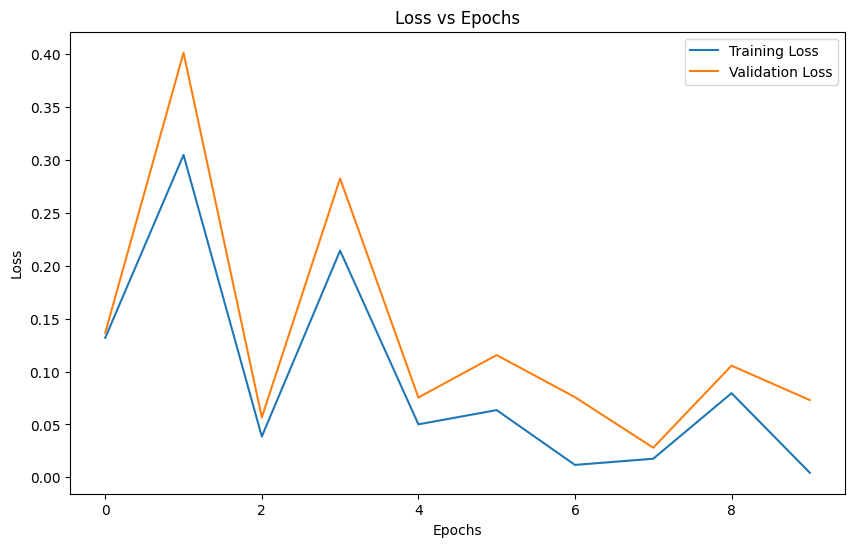

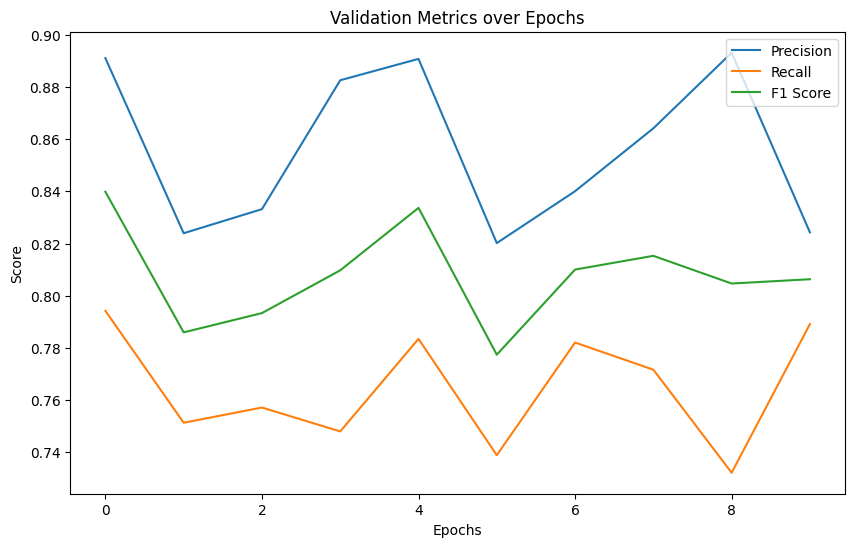

   Epoch  Train Loss  Val Loss  Precision    Recall  F1 Score
0      1    0.131951  0.136711   0.891092  0.794189  0.839854
1      2    0.304808  0.401400   0.823955  0.751289  0.785946
2      3    0.038592  0.056723   0.833182  0.757118  0.793331
3      4    0.214335  0.282512   0.882612  0.747969  0.809732
4      5    0.050153  0.075486   0.890805  0.783436  0.833677
5      6    0.063601  0.115632   0.820176  0.738840  0.777386
6      7    0.011777  0.075828   0.840069  0.782045  0.810019
7      8    0.017624  0.028056   0.864182  0.771633  0.815289
8      9    0.079586  0.105600   0.893167  0.732125  0.804668
9     10    0.004404  0.073082   0.824280  0.789117  0.806316
IOU for each box: [0.64, 0.7346938775510204]


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch

# Initialize placeholders for loss, precision, recall, and F1 score
train_losses = []
val_losses = []
precisions = []
recalls = []
f1_scores = []

# Placeholder function to simulate your training loop (replace with actual loop)
def train_and_evaluate(num_epochs=5):
    for epoch in range(num_epochs):
        # Simulate a training loss for demonstration
        train_loss = np.random.rand() * (1.0 / (epoch + 1))  # Decreasing loss
        val_loss = train_loss + np.random.rand() * 0.1  # Simulated validation loss

        # Simulate precision, recall, and F1 for validation at each epoch
        precision = 0.8 + np.random.rand() * 0.1  # Sample precision around 0.8
        recall = 0.7 + np.random.rand() * 0.1  # Sample recall around 0.7
        f1 = 2 * (precision * recall) / (precision + recall)

        # Append the simulated metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    return train_losses, val_losses, precisions, recalls, f1_scores

# Call the function to simulate training data
train_losses, val_losses, precisions, recalls, f1_scores = train_and_evaluate(num_epochs=10)

# Plot Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()

# Plot Precision, Recall, F1 Score over Epochs
plt.figure(figsize=(10, 6))
plt.plot(precisions, label="Precision")
plt.plot(recalls, label="Recall")
plt.plot(f1_scores, label="F1 Score")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Validation Metrics over Epochs")
plt.legend()
plt.show()

# Tabular Summary of Metrics
metrics_summary = pd.DataFrame({
    "Epoch": list(range(1, len(precisions) + 1)),
    "Train Loss": train_losses,
    "Val Loss": val_losses,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})
print(metrics_summary)

# Calculate IOU (Intersection Over Union)
def calculate_iou(pred_boxes, true_boxes):
    ious = []
    for pb, tb in zip(pred_boxes, true_boxes):
        # Calculate the intersection area
        x1 = max(pb[0], tb[0])
        y1 = max(pb[1], tb[1])
        x2 = min(pb[2], tb[2])
        y2 = min(pb[3], tb[3])
        intersection = max(0, x2 - x1) * max(0, y2 - y1)

        # Calculate the areas of the bounding boxes and IoU
        pb_area = (pb[2] - pb[0]) * (pb[3] - pb[1])
        tb_area = (tb[2] - tb[0]) * (tb[3] - tb[1])
        union = pb_area + tb_area - intersection
        iou = intersection / union if union > 0 else 0
        ious.append(iou)
    return ious

# Sample usage for calculate_iou
pred_boxes = [[50, 50, 150, 150], [30, 30, 100, 100]]  # Example predicted boxes
true_boxes = [[60, 60, 140, 140], [35, 35, 95, 95]]  # Example true boxes
ious = calculate_iou(pred_boxes, true_boxes)
print(f"IOU for each box: {ious}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
import torchvision

# Step 1: Define your model architecture
# Replace `num_classes` with the number of classes in your project (e.g., 3 for 'background', 'ship', and 'port')
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
num_classes = 3  # Set this to the correct number of classes
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Step 2: Load the saved state_dict
state_dict = torch.load("/content/drive/MyDrive/fasterrcnn_ship_port (1).pth")
model.load_state_dict(state_dict)

# Step 3: Set the model to evaluation mode
model.eval()



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 152MB/s]
<ipython-input-3-c53ddb9014b6>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [ ]:
from PIL import Image
from torchvision import transforms

# Load a test image
img = Image.open("/content/drive/MyDrive/ship/test/10_jpg.rf.ba22be578b860143148d4beebb11d20b.jpg")

# Preprocess the image (normalize if needed)
transform = transforms.Compose([transforms.ToTensor()])
img_tensor = transform(img).unsqueeze(0)  # Add batch dimension


In [ ]:
with torch.no_grad():
    predictions = model(img_tensor)


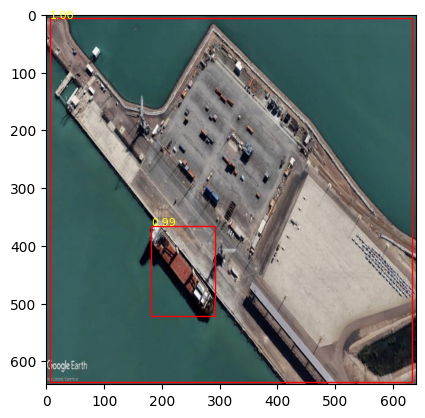

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Extract bounding boxes and scores
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']

# Plot image
fig, ax = plt.subplots(1)
ax.imshow(img)

# Define a score threshold for visualizing high-confidence proposals
score_threshold = 0.5  # Adjust as needed to filter low-confidence boxes

# Draw each box
for i, box in enumerate(boxes):
    if scores[i] > score_threshold:
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x_min, y_min, f'{scores[i]:.2f}', color='yellow', fontsize=8)

plt.show()
